In [1]:
from os import listdir
import pandas as pd
import numpy as np
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
filterwarnings('ignore')

In [28]:
plt.rcParams['font.size'] = 14
plt.rcParams['axes.axisbelow'] = True

## Homogeneous graphs

In [4]:
results_homo = None
for f in listdir('results'):
    if f.startswith('nf'):
        tmp = pd.read_csv('results/' + f)
        tmp['epoch'] = np.arange(1, len(tmp)+1)

        if results_homo is None:
            results_homo = tmp
        else:
            results_homo = results_homo.append(tmp)

In [5]:
results_homo.groupby(['model'])\
    .agg({'test_mse': 'min'})\
    .reset_index()\
    .merge(results_homo, on=['test_mse', 'model'], how='left').\
    sort_values(['test_mse'])

,model,test_mse,architecture,dropout,lr,node_features,edge_features,train_mse,epoch
1,GCN,0.808742,"(20,)",0.3,0.10,keywords,crew,0.963790,406
2,SAGE,0.891507,"(32, 16)",0.0,0.01,keywords,crew,0.962240,485
0,GAT,1.492904,"(20,)",0.0,0.10,keywords,crew,1.682293,500


In [6]:
r = results_homo.groupby(['model', 'node_features', 'edge_features'])\
    .agg({'test_mse': 'min'})\
    .reset_index()\
    .merge(results_homo, on=['test_mse', 'model', 'node_features', 'edge_features'], how='left')\
    .sort_values('test_mse').to_latex(index=False)

In [7]:
best_model_homo = results_homo.loc[results_homo.test_mse == results_homo.test_mse.min(), ['model', 'architecture', 'dropout', 'lr', 'node_features', 'edge_features']]\
    .merge(results_homo, on=['model', 'architecture', 'dropout', 'lr','node_features', 'edge_features'], how='left')

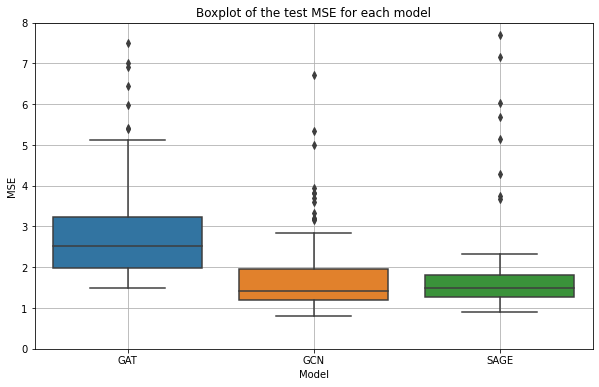

In [8]:
by_model = results_homo.groupby(['model', 'architecture', 'dropout', 'lr', 'node_features', 'edge_features'])\
    .agg({'test_mse': 'min'})\
    .reset_index()
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='test_mse', data=by_model)
plt.ylim(0, 8)
plt.ylabel('MSE')
plt.xlabel('Model')
plt.title('Boxplot of the test MSE for each model')
plt.grid()
plt.savefig('figures/boxplot_homo.pdf')

In [37]:
by_model["n_layers"] = by_model["architecture"].str.len() // 4
by_model

,model,architecture,dropout,lr,node_features,edge_features,test_mse,n_layers
0,GAT,"(20,)",0.0,0.01,keywords,cast,2.413457,1
1,GAT,"(20,)",0.0,0.01,keywords,crew,2.264192,1
2,GAT,"(20,)",0.0,0.01,overview,cast,4.590838,1
3,GAT,"(20,)",0.0,0.01,overview,crew,3.532731,1
4,GAT,"(20,)",0.0,0.01,overview,keywords,4.057538,1
...,...,...,...,...,...,...,...,...
400,SAGE,"(64, 32, 32)",0.5,0.10,keywords,cast,5.693538,3
401,SAGE,"(64, 32, 32)",0.5,0.10,keywords,crew,5.139105,3
402,SAGE,"(64, 32, 32)",0.5,0.10,overview,cast,8.901544,3
403,SAGE,"(64, 32, 32)",0.5,0.10,overview,crew,25.985867,3


## Heterogeneous graphs

In [11]:
results_hetero = None
for f in listdir('results'):
    if f.startswith('hetero'):
        tmp = pd.read_csv('results/' + f)
        tmp['epoch'] = np.arange(1, len(tmp)+1)

        if results_hetero is None:
            results_hetero = tmp
        else:
            results_hetero = results_hetero.append(tmp)

In [12]:
results_hetero.groupby(['architecture', 'dropout', 'lr', 'node_features'])\
    .agg({'test_mse': 'min'})\
    .reset_index()\
    .merge(results_hetero, on=['test_mse', 'architecture', 'dropout', 'lr'], how='left')\
    .sort_values(['test_mse'])\
    .head(10)[["node_features_x", "architecture", "dropout", "lr", "train_mse", "test_mse"]]

,node_features_x,architecture,dropout,lr,train_mse,test_mse
26,keywords,16,0.3,0.03,0.264546,1.255028
52,keywords,24,0.5,0.10,0.231886,1.314430
28,keywords,16,0.3,0.10,0.214463,1.331655
34,keywords,16,0.5,0.10,0.209470,1.340809
11,overview,8,0.3,0.10,0.232170,1.386155
47,overview,24,0.3,0.10,0.356842,1.419236
10,keywords,8,0.3,0.10,0.187464,1.425040
44,keywords,24,0.3,0.03,0.268063,1.487400
17,overview,8,0.5,0.10,0.338780,1.509229
15,overview,8,0.5,0.03,0.440174,1.518351


In [13]:
best_model_hetero = results_hetero.loc[results_hetero.test_mse == results_hetero.test_mse.min(), ['architecture', 'dropout', 'lr', 'node_features']].merge(results_hetero, on=['architecture', 'dropout', 'lr','node_features'], how='left')

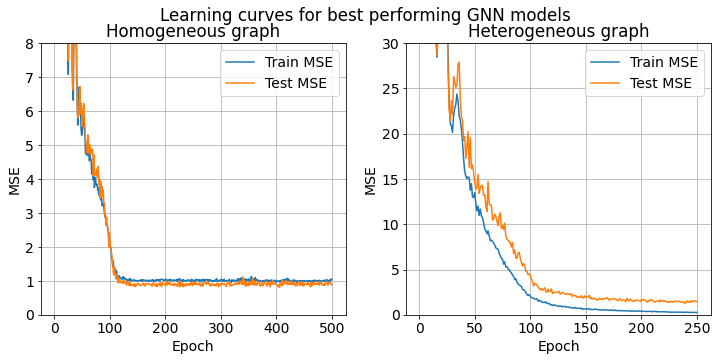

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
best_model_homo.rename(columns = {"train_mse": "Train MSE", 'test_mse': "Test MSE"}).plot(x='epoch', y=['Train MSE', 'Test MSE'], ax=axs[0])
axs[0].set_ylim(0, 8)
axs[0].set_ylabel('MSE')
axs[0].set_title('Homogeneous graph')
axs[0].set_xlabel('Epoch')
axs[0].grid()

best_model_hetero.rename(columns = {"train_mse": "Train MSE", 'test_mse': "Test MSE"}).plot(x='epoch', y=['Train MSE', 'Test MSE'], ax=axs[1])
axs[1].set_ylim(0, 30)
axs[1].set_ylabel('MSE')
axs[1].set_title('Heterogeneous graph')
axs[1].set_xlabel('Epoch')
axs[1].grid()

fig.suptitle("Learning curves for best performing GNN models")
plt.savefig("figures/learning_curves.pdf")